# CS Lab

Possible order of things:

* Show some basic expression examples
    * Variables
* Functions
* Recursion
* Some kind of drawing introduction
    * Does turtle work in iPython? What about the Graphics package? Should we just use MatPlotLib drawing utils?
* Make a recursive drawing
    * Prove an example of one, maybe the recursive tree

In [1]:
from drawing import *
from math import *
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [63]:
size = 4
background_color=(1,1,1)
angle=[0]
pen_state=[0]
pos=[0,0]
p=[None]
image = [Image.new('RGBA', (200, 200))]
draw = [ImageDraw.Draw(image[0])]
color=[255, 0, 0]

def new_drawing():
    fig = plt.figure(figsize=(size,size),facecolor=background_color)
    #plt.axis("off")
    #ax = plt.Axes(fig, [0., 0., 1., 1.])
    #ax.set_axis_off()
    #fig.add_axes(ax)
    p[0] = plt
    angle[0]=0
    pen_state[0]=0
    pos[0]=0
    pos[1]=0
    image[0] = Image.new('RGBA', (200, 200))
    draw[0] = ImageDraw.Draw(image[0])

def show():
    p[0].imshow(np.asarray(image[0]))

def pen_down():
    pen_state[0]=1

def pen_up():
    pen_state[0]=0

def forward(dist):
    newpos = [pos[0] + cos(angle[0])*dist, pos[1] + sin(angle[0])*dist]
    if pen_state[0] == 1:
        draw[0].line([(pos[0], pos[1]), (newpos[0], newpos[1])], (color[0], color[1], color[2]), 2)
    pos[0] = newpos[0]
    pos[1] = newpos[1]

def goto(x, y):
    pos[0] = x
    pos[1] = y

def turn_right(deg):
    angle[0] += deg * pi / 180
    
def turn_left(deg):
    turn_right(-deg)

def set_color(c):
    color[0] = c[0]
    color[1] = c[1]
    color[2] = c[2]

def get_color():
    return color
    

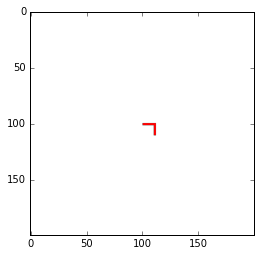

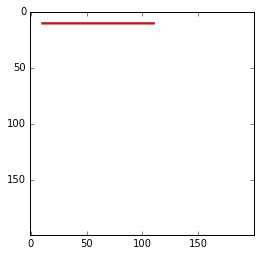

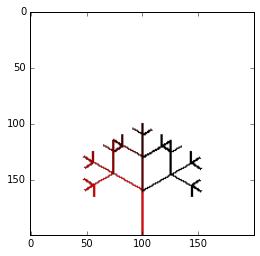

In [64]:
new_drawing()
goto(100,100)
pen_down()
turn_right(0)
forward(10)
turn_right(90)
forward(10)
pen_up()
show()

new_drawing()
goto(10,10)
pen_down()
forward(100)
show()

new_drawing()
def tree(n):
    if n == 0:
        return
    c = get_color()
    set_color((c[0] - 10, c[1], c[2]))
    pen_down()
    forward(10*n)
    pen_up()
    set_color(c)
    turn_left(60)
    tree(n-1)
    turn_right(60)
    tree(n-1)
    turn_right(60)
    tree(n-1)
    turn_left(60)
    forward(-10*n)
goto(100,200)
turn_left(90)
tree(4)
show()